**Import Libraries**

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

**Load Data**

In [166]:
df = load_breast_cancer()

In [167]:
X = pd.DataFrame(df.data, columns=df.feature_names)
Y = pd.Series(df.target)

In [168]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("Target names:", df.target_names)
print("Label mapping: 0=malignant, 1=benign")


X shape: (569, 30)
Y shape: (569,)
Target names: ['malignant' 'benign']
Label mapping: 0=malignant, 1=benign


In [169]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**EDA**

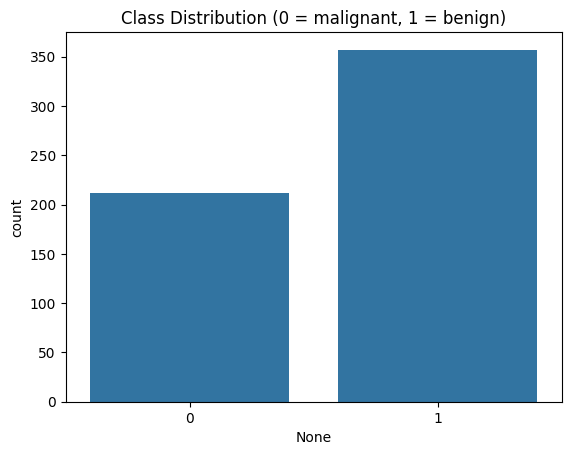

In [170]:
sns.countplot(x=Y)
plt.title("Class Distribution (0 = malignant, 1 = benign)")
plt.show()

In [171]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


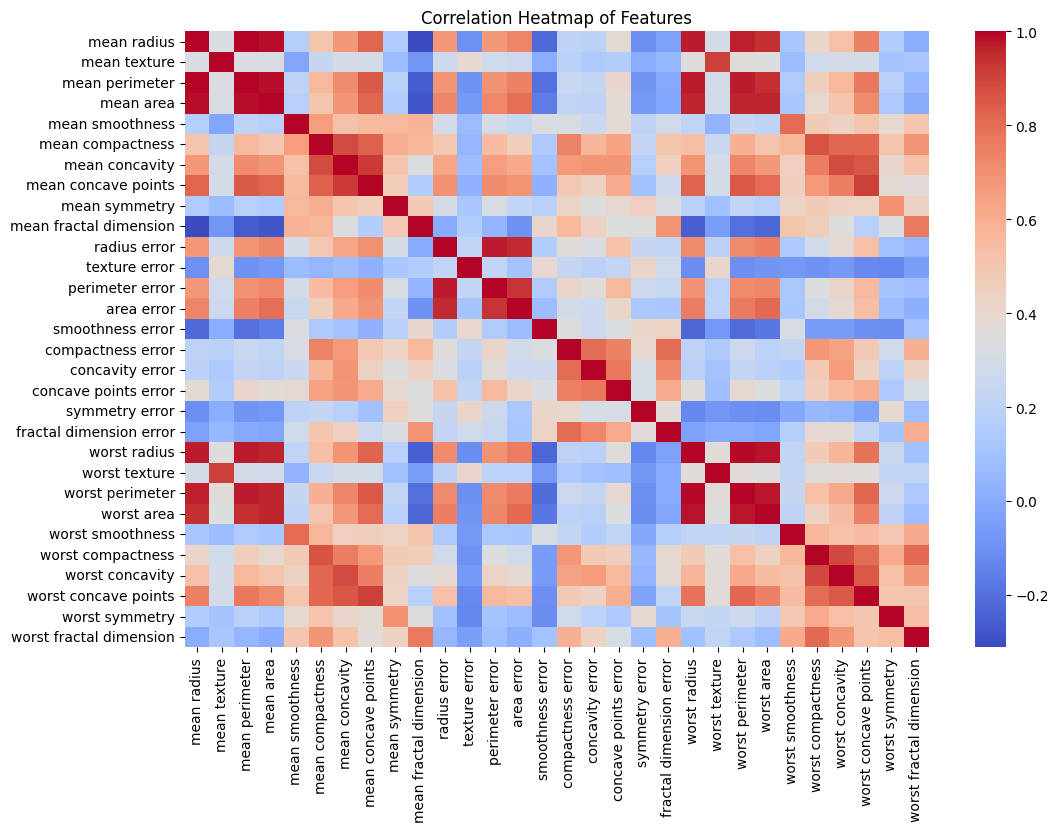

In [172]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

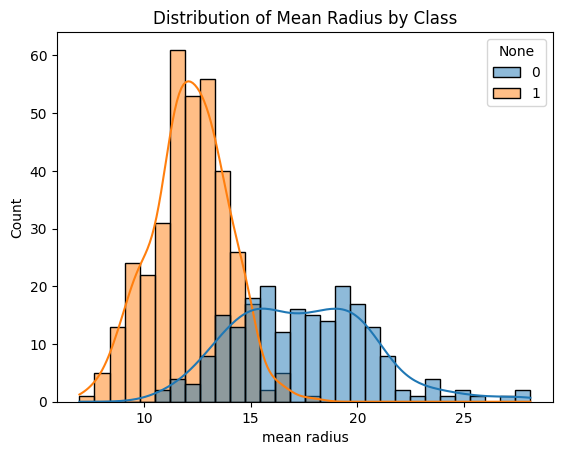

In [173]:
sns.histplot(x=X["mean radius"], hue=Y, bins=30, kde=True)
plt.title("Distribution of Mean Radius by Class")
plt.show()

**Train/Test Split + Scalling**

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

**Logistic Regression**

Logistic Regression Results:
Accuracy : 0.9883040935672515
Precision: 0.9906542056074766
Recall   : 0.9906542056074766
F1 Score : 0.9906542056074766
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



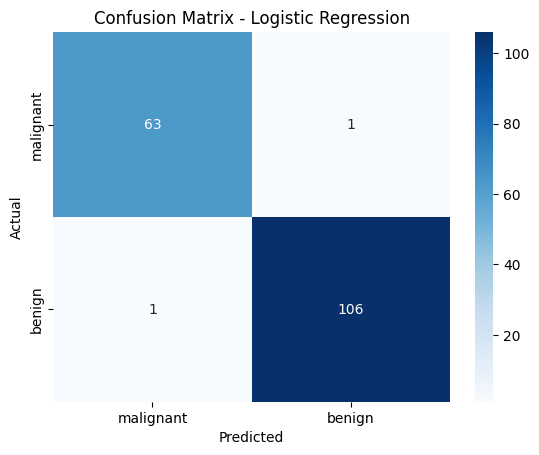

In [175]:
lr = LogisticRegression(max_iter=5000, random_state=42)

lr.fit(X_train_scaled, Y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy :", accuracy_score(Y_test, y_pred_lr))
print("Precision:", precision_score(Y_test, y_pred_lr))
print("Recall   :", recall_score(Y_test, y_pred_lr))
print("F1 Score :", f1_score(Y_test, y_pred_lr))
print("Classification Report:\n", classification_report(Y_test, y_pred_lr))

cm = confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df.target_names, yticklabels=df.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest**

Random Forest Results:
Accuracy : 0.935672514619883
Precision: 0.9444444444444444
Recall   : 0.9532710280373832
F1 Score : 0.9488372093023256
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



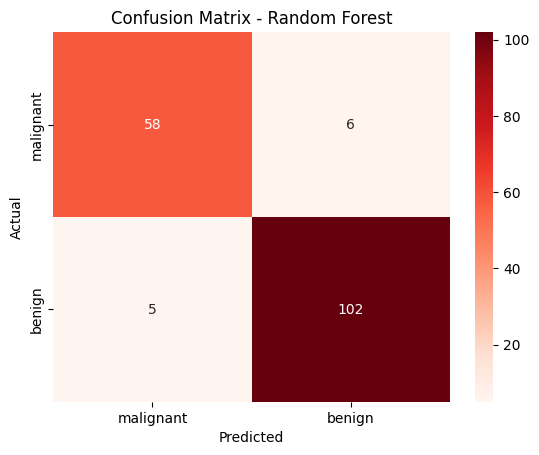

In [176]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy :", accuracy_score(Y_test, y_pred_rf))
print("Precision:", precision_score(Y_test, y_pred_rf))
print("Recall   :", recall_score(Y_test, y_pred_rf))
print("F1 Score :", f1_score(Y_test, y_pred_rf))
print("Classification Report:\n", classification_report(Y_test, y_pred_rf))

cm = confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=df.target_names, yticklabels=df.target_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SVM**

SVM Results:
Accuracy : 0.9766081871345029
Precision: 0.9813084112149533
Recall   : 0.9813084112149533
F1 Score : 0.9813084112149533
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



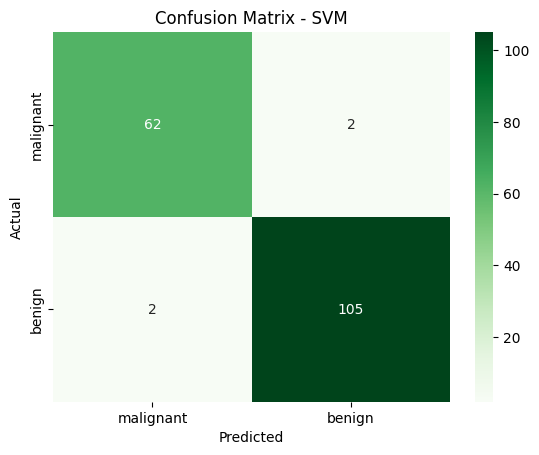

In [177]:
svm = SVC(kernel="rbf", probability=True, random_state=42)

svm.fit(X_train_scaled, Y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print("Accuracy :", accuracy_score(Y_test, y_pred_svm))
print("Precision:", precision_score(Y_test, y_pred_svm))
print("Recall   :", recall_score(Y_test, y_pred_svm))
print("F1 Score :", f1_score(Y_test, y_pred_svm))
print("Classification Report:\n", classification_report(Y_test, y_pred_svm))

cm = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=df.target_names, yticklabels=df.target_names)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**XGBoost**

XGBoost Results:
Accuracy : 0.9649122807017544
Precision: 0.954954954954955
Recall   : 0.9906542056074766
F1 Score : 0.9724770642201835
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



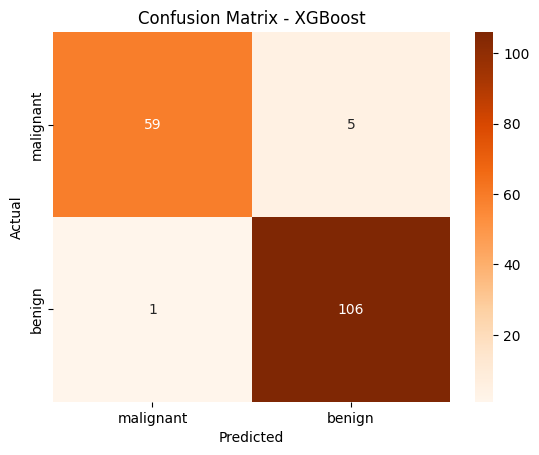

In [178]:
xgb = XGBClassifier(eval_metric="logloss", random_state=42)

xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print("Accuracy :", accuracy_score(Y_test, y_pred_xgb))
print("Precision:", precision_score(Y_test, y_pred_xgb))
print("Recall   :", recall_score(Y_test, y_pred_xgb))
print("F1 Score :", f1_score(Y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(Y_test, y_pred_xgb))

cm = confusion_matrix(Y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=df.target_names, yticklabels=df.target_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Model Comparison**

Model Comparison 📊 :
           Logistic Regression  Random Forest       SVM   XGBoost
Accuracy              0.988304       0.935673  0.976608  0.964912
Precision             0.990654       0.944444  0.981308  0.954955
Recall                0.990654       0.953271  0.981308  0.990654
F1 Score              0.990654       0.948837  0.981308  0.972477


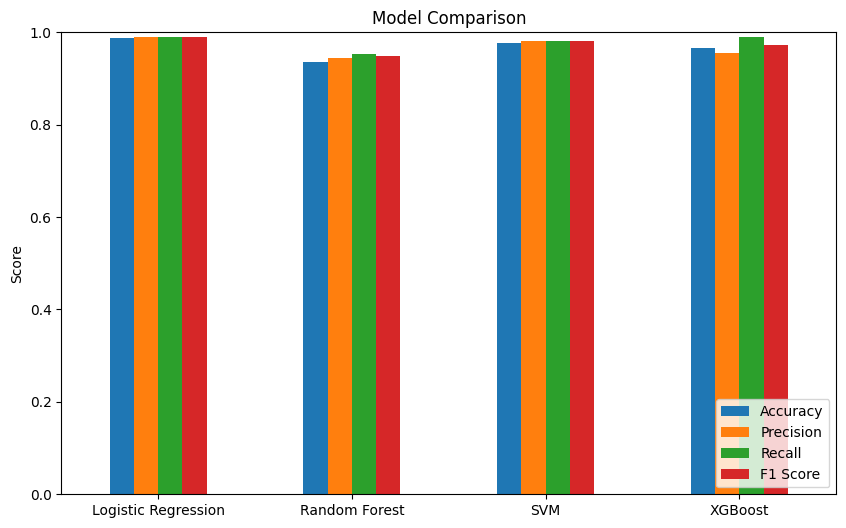

In [179]:
results = {
    "Logistic Regression": [
        accuracy_score(Y_test, y_pred_lr),
        precision_score(Y_test, y_pred_lr),
        recall_score(Y_test, y_pred_lr),
        f1_score(Y_test, y_pred_lr)
    ],
    "Random Forest": [
        accuracy_score(Y_test, y_pred_rf),
        precision_score(Y_test, y_pred_rf),
        recall_score(Y_test, y_pred_rf),
        f1_score(Y_test, y_pred_rf)
    ],
    "SVM": [
        accuracy_score(Y_test, y_pred_svm),
        precision_score(Y_test, y_pred_svm),
        recall_score(Y_test, y_pred_svm),
        f1_score(Y_test, y_pred_svm)
    ],
    "XGBoost": [
        accuracy_score(Y_test, y_pred_xgb),
        precision_score(Y_test, y_pred_xgb),
        recall_score(Y_test, y_pred_xgb),
        f1_score(Y_test, y_pred_xgb)
    ]
}

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
df_results = pd.DataFrame(results, index=metrics)

print("Model Comparison 📊 :")
print(df_results)

df_results.T.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
